In [38]:
import os
import cv2
import json
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

### Random Data Visualization

In [3]:
coco_json = json.load(open('datasets/train.json'))

In [18]:
images = coco_json['images']
annotations = coco_json['annotations']
categories = {k['id']:k['name'] for k in coco_json['categories']}

4883


In [12]:
COLOR_MAP = [
    (171, 222, 230), (203, 170, 203), (255, 255, 181), (255, 204, 182), (243, 176, 195),
    (151, 193, 169), (254, 225, 232), (198, 219, 218), (255, 150, 138), (85, 203, 205)
]

In [73]:
def random_vis(root_dir: str, rows: int, cols: int, idxs: list):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    
    for i, idx in enumerate(idxs):
        r, c = i//cols, i%cols
        img_path = os.path.join(root_dir, images[idx]['file_name'])
        img = np.array(Image.open(img_path).convert("RGB"))
        candits = [k for k in annotations if k['image_id'] == images[idx]['id']]
        
        for candit in candits:
            bbox = candit['bbox']
            bbox = [int(k) for k in bbox]
            cat_id = candit['category_id']
            cat_name = categories[cat_id]
            color = [num/255 for num in COLOR_MAP[cat_id%10]]
            
            bbox_rect = patches.Rectangle(
                (bbox[0], bbox[1]), 
                bbox[2], bbox[3], 
                linewidth=5, 
                edgecolor=color, 
                facecolor='none'
            )
            
            axes[r][c].add_patch(bbox_rect)
            axes[r][c].annotate(
                cat_name, 
                (bbox[0]+5, bbox[1]-10), 
                color='white', 
                weight='bold', 
                fontsize=15,
                backgroundcolor=color
            )
        
        axes[r][c].imshow(img)
        axes[r][c].axis('off')
        axes[r][c].set_title(img_path.split('/')[-1])
        
    plt.tight_layout()
    plt.show()

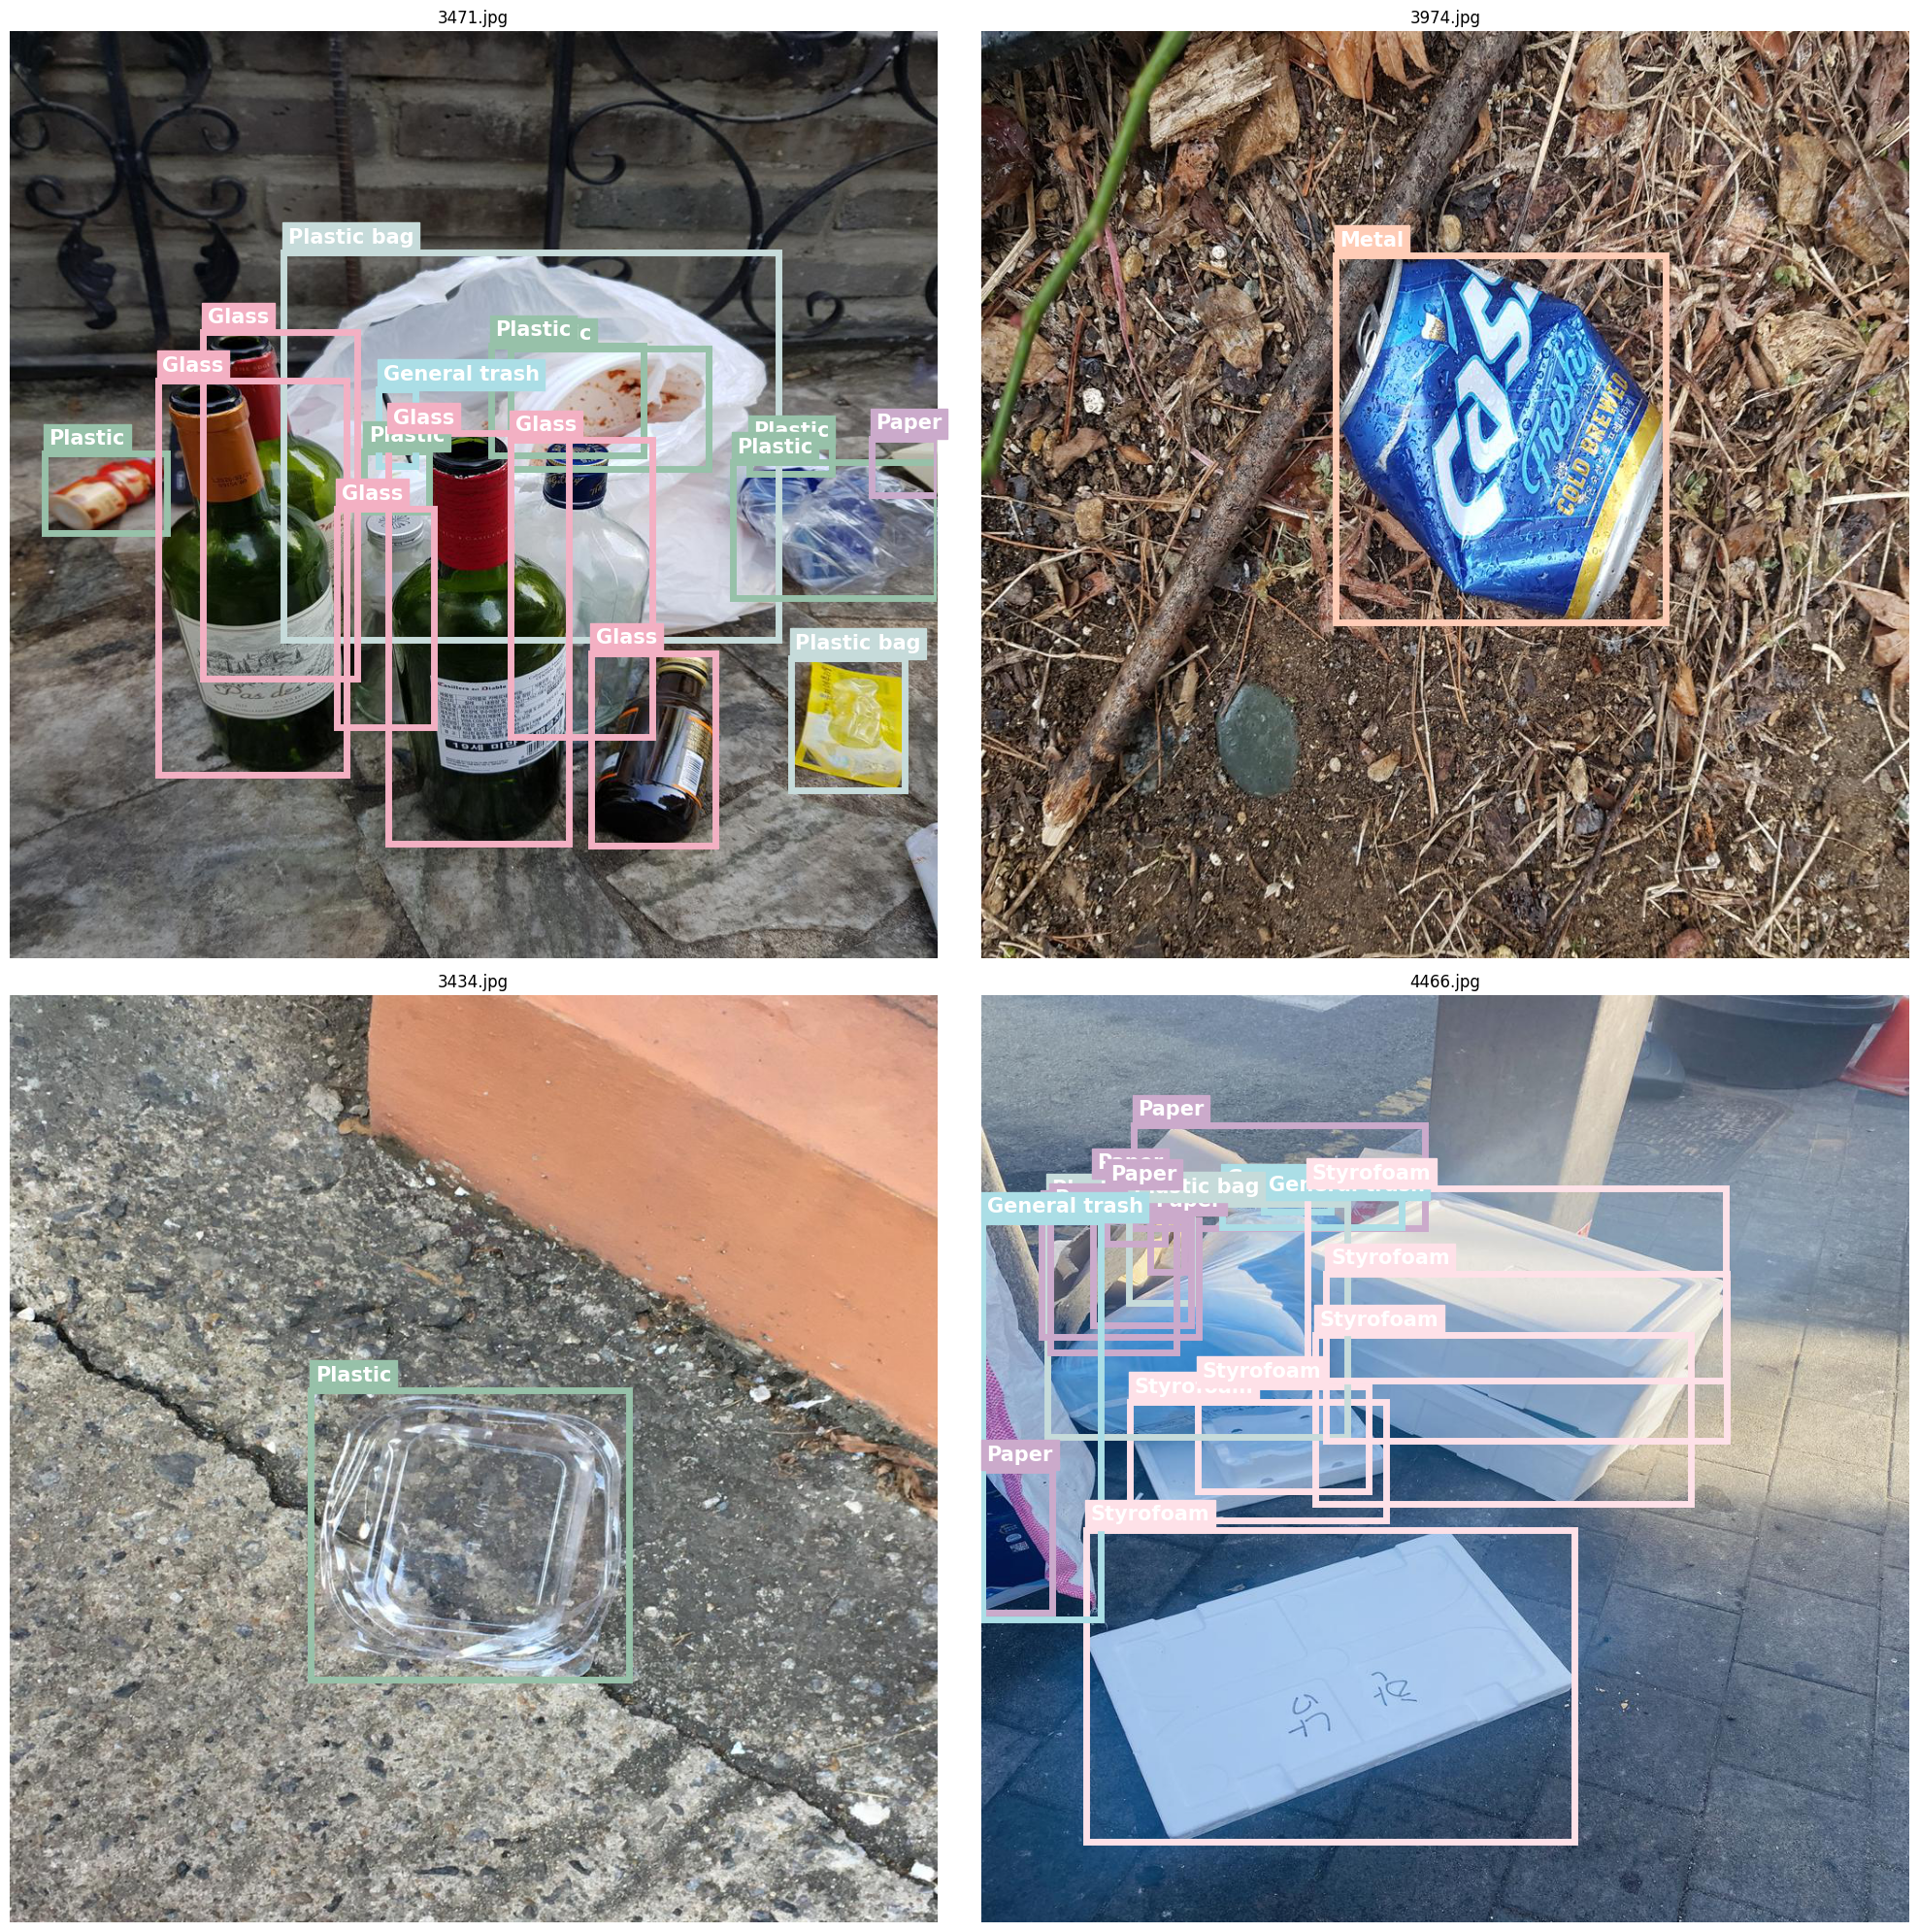

In [74]:
idxs = random.sample(list(range(len(images))), 4)
random_vis("datasets", 2, 2, idxs)